In [1]:
import pandas as pd
import numpy as np

# this will compile a Stan model and therefore may take some time
import GPrecords

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c290561057c18ffe78c9cf7f864f02d3 NOW.


# Data
I manually extracted the following data from [Wikipedia](https://en.wikipedia.org/wiki/Men%27s_100_metres_world_record_progression#Records_from_1977) on 05.05.2018. I restricted myself to records that were automatically recorded up to a precision of 0.01 seconds.

In [2]:
data = pd.read_csv("100m_records_only.csv", sep=';', skiprows=1, parse_dates=['Date'])
data

,Time,Athlete,Nationality,Location of race,Date
0,10.06,Bob Hayes,USA,Tokyo,1964-10-15
1,10.03,Jim Hines,USA,Sacramento,1968-07-20
2,10.02,Charles Greene,USA,Mexico City,1968-10-13
3,9.95,Jim Hines,USA,Mexico City,1968-10-14
4,9.93,Calvin Smith,USA,Colorado Springs,1983-07-03
5,9.93,Carl Lewis,USA,Rome,1987-08-30
6,9.93,Carl Lewis,USA,Zurich,1988-08-17
7,9.92,Carl Lewis,USA,Seoul,1988-09-24
8,9.90,Leroy Burrell,USA,New York,1991-07-14
9,9.86,Carl Lewis,USA,Tokyo,1991-08-25


Now transform the data so that you have at least one data point per year indicating that no one in that year achieved a record. If there were severy records in one year, list them in the order they appear, but associate only with the year.

In [3]:
yearly = data.set_index('Date')
yearly.index = yearly.index.map(lambda d: d.year)
years = np.arange(data.Date.iloc[0].year, pd.datetime.today().year)
for year in years[1:]:
    if year not in yearly.index:
        yearly.loc[year] = [yearly.loc[year-1].Time.min(), '-', '-', '-']

yearly['negyear'] = -yearly.index
yearly.sort_values(['negyear', 'Time'], ascending=False, inplace=True)
yearly

,Time,Athlete,Nationality,Location of race,negyear
Date,,,,,
1964,10.06,Bob Hayes,USA,Tokyo,-1964
1965,10.06,-,-,-,-1965
1966,10.06,-,-,-,-1966
1967,10.06,-,-,-,-1967
1968,10.03,Jim Hines,USA,Sacramento,-1968
1968,10.02,Charles Greene,USA,Mexico City,-1968
1968,9.95,Jim Hines,USA,Mexico City,-1968
1969,9.95,-,-,-,-1969
1970,9.95,-,-,-,-1970


## Athletes who attempted a world record for each year
I'm only interested in the absolute top of athletes - those that really attempt to break world records. I will simply assume that these are the athletes running, for example, in an Olympic final of 8 athletes. So I will only consider the 8 top athletes per year. I further assume that each athlete is among the top for about 9 years. 3 before (including) and 6 after their first world record, if they had one.

In [4]:
# length of top career
L1 = 3
L2 = 6
L = L1 + L2

# number of athletes per year
AY = 8

# collection of all athletes
athletes = pd.Series(data.Athlete.unique())
athletes.index = athletes.index + 1
recordholders = athletes.copy()

# add athlete index to yearly data
def getaind(name):
    return 0 if not np.any(athletes == name) else athletes[athletes == name].index[0]
yearly['aind'] = yearly.Athlete.map(getaind)

# active athletes
active = pd.DataFrame(np.zeros((years.size, athletes.size), dtype=bool), 
                      index=years, columns=athletes.index)

# fill in active period for each world record holder
for athlete in athletes.index:
    # get year of first world record
    year = yearly[yearly.Athlete == athletes.loc[athlete]].index.min()
    
    active.loc[slice(year - L1 + 1, year + L2), athlete] = True

# add anonymous athletes to get AY athletes per year
for year in years:
    while active.loc[year].sum() < AY:
        newa = athletes.index.max() + 1
        athletes.loc[newa] = 'anonymous'
        active[newa] = False
        active.loc[slice(year, year + L - 1), newa] = True

# the above construction will have lead to years with more than 8 athletes
# go through these years and remove random anonymous athletes from them to get exactly AY
for year in active[active.sum(axis=1) > AY].index:
    aths = active.loc[year]
    aths = aths[aths].index
    
    toomany = aths.size - AY
    
    aths = aths.difference(recordholders.index)
    aths = np.random.permutation(aths)[:toomany]
    
    active.loc[year, aths] = False
    
# get array with indices of athletes that are active at each data point
activeathletes = pd.concat(
    [pd.Series(athletes[active.loc[year]].index, name=year) 
     for year in yearly.index], axis=1).T

# Infer hidden world performance index

In [5]:
standata = dict(
    A=athletes.size, N=yearly.shape[0], AY=AY,
    athletes=activeathletes, years=yearly.index, 
    records=yearly.Time, recordsa=yearly.aind, astd_std=0.1)

In [12]:
standata = dict(
    A=athletes.size, N=yearly.shape[0], AY=AY,
    athletes=activeathletes, years=yearly.index, 
    records=yearly.Time, recordsa=yearly.aind, astd_std=0.1)

fit = GPrecords.sm.sampling(standata, iter=2000, chains=4)

/home/bitzer/miniconda3/envs/100m/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [13]:
print(fit.stansummary())

Inference for Stan model: anon_model_c290561057c18ffe78c9cf7f864f02d3.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                      mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
worldspeed            0.27  3.9e-3   0.09   0.13    0.2   0.25   0.31   0.51    553    1.0
ability_std           0.12  1.5e-3   0.04   0.07   0.09   0.11   0.14   0.21    611    1.0
abilities[0]         -0.44    0.01   0.47  -1.16  -0.76  -0.52  -0.21   0.69   1154    1.0
abilities[1]         -0.57    0.01   0.41  -1.25  -0.85  -0.62  -0.34   0.44   1108    1.0
abilities[2]         -0.41    0.01   0.47  -1.13  -0.73  -0.48  -0.15   0.76   1441    1.0
abilities[3]         -0.69    0.01   0.53   -1.5  -1.05  -0.78   -0.4   0.59   1572    1.0
abilities[4]         -1.33  8.9e-3    0.3  -1.92  -1.52  -1.33  -1.14  -0.73   1136    1.0
abilities[5]         -1.16  9.9e-3   0.41  -1.85  -1.42   -1.2  -0.94  -0.21   1727

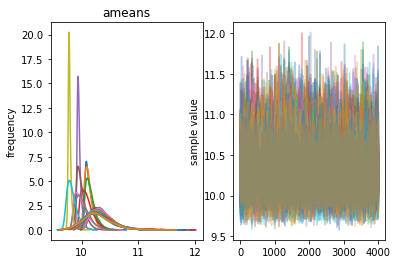

In [14]:
fit.plot('ameans');

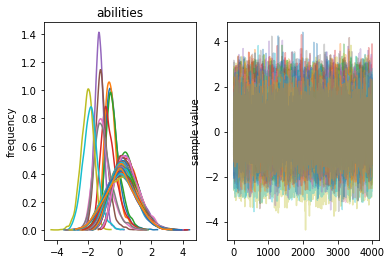

In [15]:
fit.plot('abilities');

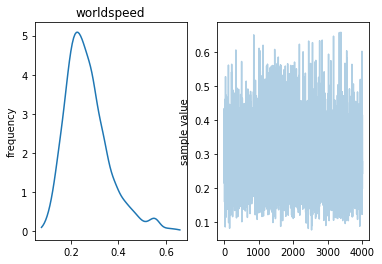

In [16]:
fit.plot('worldspeed');